## **Principal Component Analysis(PCA, 주성분분석)**  
1. 주성분 분석은 차원축소를 위해 사용됨  
  --> 고차원의 데이터를 저차원의 데이터로 feature extraction 가능  
    
    - 목적  
      - 차원(dimension)을 감소시켜 시각화에 도움  
      - 변수의 수를 줄임
    - 기대효과  
      - 통계 : 적은 수의 특성으로 특정 현상을 설명  
      - 머신러닝 : 모델 성능 강화  
2. 개념  
  - 여러개의 양적 변수들 사이의 공분산(상관계수)를 이용하여
  - 변수들의 선형결합으로 표시되는 주성분을 찾음(축의 개념)  
  - 2~3개의 주성분으로 전체 분산(variance)의 대부분을 설명하고자 하는 다변량 분석법
  - 원 데이터의 소실없이 데이터를 잘 설명할 수 있는 변수들의 선형 조합을 찾는 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

**[eigenvector / eigenvalue]**  
 - 특징  
   - n by n 정방행렬은 n개의 eigenvector 를 가짐 (n개의 eigenvalue)  
 - 제약 : pca에서 eigenvector의 loading 계수 제곱합은 1

#### **[Linear Transform]**

In [2]:
matrix_a = np.array([[2,3],
                    [2,1]])

In [4]:
vec = np.array([[1],[3]])

In [5]:
np.dot(matrix_a, vec)

array([[11],
       [ 5]])

**[eigenvector & eigenvalue]**

In [6]:
eigen_a = np.array([[3],[2]])

In [8]:
np.dot(matrix_a, eigen_a)

array([[12],
       [ 8]])

### **how to calculate eigenvector?**

In [9]:
a = np.array([[3,0,1], [-4,1,2],[-6,0,-2]])

In [10]:
a

array([[ 3,  0,  1],
       [-4,  1,  2],
       [-6,  0, -2]])

In [11]:
np.linalg.eig(a)

(array([ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16]),
 array([[ 0.00000000e+00,  5.55111512e-17, -9.53462589e-02],
        [ 1.00000000e+00, -1.00000000e+00, -9.53462589e-01],
        [ 0.00000000e+00, -1.11022302e-16,  2.86038777e-01]]))

In [12]:
eig_val, eig_vec = np.linalg.eig(a)

In [16]:
eig_vec[:, np.newaxis,0]

array([[0.],
       [1.],
       [0.]])

In [19]:
eig_vec[:, np.newaxis,1]

array([[ 5.55111512e-17],
       [-1.00000000e+00],
       [-1.11022302e-16]])

In [20]:
eig_vec[:, np.newaxis,2]

array([[-0.09534626],
       [-0.95346259],
       [ 0.28603878]])

In [21]:
# 세번째 고유벡터의 제곱합
np.sum(eig_vec[:, np.newaxis, 2]**2)

1.0

**[covariance의 이해 (feat. correlation)]**

- 상관계수행렬은 데이터의 분포를 표현(분포에 관한 정보라고 간주)  
- n by n 상관계수행렬은 n개의 eigenvector를 가짐  
- 이 eigenvector들과 상관계수 행렬의 선형변환으로 데이터가 변하지 않음(데이터 소실 없음)  
- eigenvector를 n개의 축이라고 생각할 때 데이터를 이 n개의 축에 대하여 변환을 실시하면?  
- n번의 변환에서 각각 상관계수 행렬이 가졌던 오리지널 데이터의 분포에 관한 정보를 전부 나눠가지게 될 것  
- 만약 특정 축 몇개가 분포에 관한 정보(분산의) 대부분을 가져간다면?  
- 이 몇개의 축으로 (주성분으로, 특성의 수로) 데이터의 대부분을 설명할 수 있을 것  
  
==> 차원축소(dimension reduction, feature extraction)가 가능해짐

#### **PCA는 데이터를 표준화(standardizing)하여 진행한다**

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [24]:
lamen = dict({'name':['쇠고기라면','해물라면','얼큰라면',
                      '떡라면','짬뽕라면','만두라면','치즈라면',
                      '된장라면','볶음라면','김치라면'],
              'noodle':[2,1,5,2,3,4,4,1,3,5],
              'bowl':[4,5,3,2,5,3,4,2,3,5],
              'soup':[5,1,4,3,5,2,3,1,2,3]})
lamen

{'name': ['쇠고기라면',
  '해물라면',
  '얼큰라면',
  '떡라면',
  '짬뽕라면',
  '만두라면',
  '치즈라면',
  '된장라면',
  '볶음라면',
  '김치라면'],
 'noodle': [2, 1, 5, 2, 3, 4, 4, 1, 3, 5],
 'bowl': [4, 5, 3, 2, 5, 3, 4, 2, 3, 5],
 'soup': [5, 1, 4, 3, 5, 2, 3, 1, 2, 3]}

In [26]:
lamen1 = pd.DataFrame(lamen)
lamen1

,name,noodle,bowl,soup
0,쇠고기라면,2,4,5
1,해물라면,1,5,1
2,얼큰라면,5,3,4
3,떡라면,2,2,3
4,짬뽕라면,3,5,5
5,만두라면,4,3,2
6,치즈라면,4,4,3
7,된장라면,1,2,1
8,볶음라면,3,3,2
9,김치라면,5,5,3


### **How StandardScaler works?**

In [27]:
noodle_sd = np.std(lamen1['noodle'])

In [28]:
noodle_mean = np.mean(lamen1['noodle'])

In [29]:
a = []
for i in range(len(lamen1['noodle'])):
    a.append((lamen1['noodle'][i] - noodle_mean)/noodle_sd)
a

[-0.7071067811865475,
 -1.414213562373095,
 1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 0.7071067811865475,
 -1.414213562373095,
 0.0,
 1.414213562373095]

### **StandardScaler 적용**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
# 1. 데이터 분리
lamenEval = lamen1[['noodle', 'bowl', 'soup']]
lamenName = lamen1[['name']]

In [33]:
# 2. 스케일러로 값 변환
scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape

(10, 3)

#### **PCA modeling**  
  - PCA.fit() : 주성분을 찾음  
  - PCA.transform() : 새로운 주성분으로 데이터 변환

In [35]:
# 3. PCA modeling
pca_lamen = PCA()
pca_lamen.fit(lamen_scaled) # 주성분 (eigenvectors 생성)

# data transformation
X_pca_lamen = pca_lamen.transform(lamen_scaled) # 주성분에 대한 데이터 변환

# look into data shape
print('original data : {}'.format(str(lamen_scaled.shape)))
print('deducted data : {}'.format(str(X_pca_lamen.shape)))

original data : (10, 3)
deducted data : (10, 3)


In [37]:
# 4. 변환된 데이터 확인
X_pca_lamen
# z1, z2, z3

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [38]:
pca_lamen.components_  # eigenvector

array([[-0.571511  , -0.52211611, -0.63306393],
       [-0.60447096,  0.78960694, -0.105526  ],
       [-0.5549685 , -0.32235949,  0.76687308]])

**eigenvalue의 이해 (feat. cov of transformed data)**

In [39]:
lamen1.corr()

,noodle,bowl,soup
noodle,1.000000,0.19050,0.360041
bowl,0.190500,1.00000,0.300480
soup,0.360041,0.30048,1.000000


In [40]:
eig_val, eig_vec = np.linalg.eig(lamen1.corr())

In [41]:
eig_vec

array([[-0.571511  , -0.60447096, -0.5549685 ],
       [-0.52211611,  0.78960694, -0.32235949],
       [-0.63306393, -0.105526  ,  0.76687308]])

In [42]:
X_pca_lamen

array([[-0.75045146,  0.54986707,  1.44804503],
       [ 1.02673873,  1.99341604, -0.68029269],
       [-1.03344902, -1.36473856,  0.00244833],
       [ 1.10826926, -0.71479113,  0.91138358],
       [-1.62344488,  0.83152952,  0.76613567],
       [ 0.29164279, -0.78379531, -0.72076585],
       [-0.63771758, -0.15146621, -0.45243513],
       [ 2.43336106, -0.13384787,  0.1881694 ],
       [ 0.69576209, -0.3563698 , -0.32834386],
       [-1.51071099,  0.13019625, -1.13434448]])

In [61]:
kk = pd.DataFrame(X_pca_lamen)
kk.cov(ddof = 0)

TypeError: cov() got an unexpected keyword argument 'ddof'

In [56]:
np.cov(X_pca_lamen.T, ddof = 0)

array([[ 1.57285386e+00, -3.63655046e-17,  7.93454755e-18],
       [-3.63655046e-17,  8.14008318e-01, -4.22580952e-17],
       [ 7.93454755e-18, -4.22580952e-17,  6.13137822e-01]])

In [58]:
eig_val

array([1.57285386, 0.81400832, 0.61313782])

In [62]:
np.corrcoef(X_pca_lamen)

array([[ 1.        , -0.54543647,  0.65000347, -0.20235648,  0.90400156,
        -0.891286  ,  0.47266235, -0.8608972 , -0.90400156,  0.32018838],
       [-0.54543647,  1.        , -0.99147361, -0.71043981, -0.13474095,
         0.10608686,  0.48080895,  0.04313057,  0.13474095,  0.6193843 ],
       [ 0.65000347, -0.99147361,  1.        ,  0.61267731,  0.2627114 ,
        -0.23475458, -0.36245238, -0.17294916, -0.2627114 , -0.51180026],
       [-0.20235648, -0.71043981,  0.61267731,  1.        , -0.60161497,
         0.62441824, -0.95865867,  0.67246141,  0.60161497, -0.99254716],
       [ 0.90400156, -0.13474095,  0.2627114 , -0.60161497,  1.        ,
        -0.99958343,  0.80404483, -0.99577024, -1.        ,  0.6944722 ],
       [-0.891286  ,  0.10608686, -0.23475458,  0.62441824, -0.99958343,
         1.        , -0.82086983,  0.99800715,  0.99958343, -0.71494906],
       [ 0.47266235,  0.48080895, -0.36245238, -0.95865867,  0.80404483,
        -0.82086983,  1.        , -0.85527188

In [63]:
np.cov(eig_vec)

array([[ 6.35084295e-04, -1.58291537e-02,  8.15945520e-03],
       [-1.58291537e-02,  4.99498238e-01,  2.58643061e-04],
       [ 8.15945520e-03,  2.58643061e-04,  4.99866677e-01]])

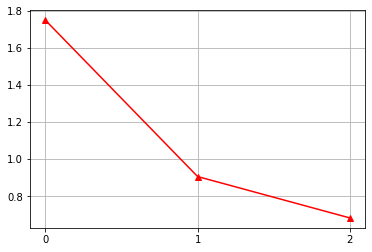

In [64]:
# 공분산의 크기
plt.xticks(range(len(pca_lamen.explained_variance_)))
plt.plot(pca_lamen.explained_variance_, marker = '^', c = 'red')
plt.grid()

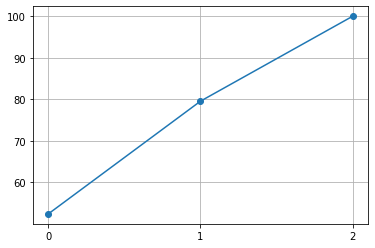

In [68]:
# 100분율
cumVar = np.cumsum(np.round(pca_lamen.explained_variance_ratio_, decimals = 4)*100)
plt.xticks(range(len(pca_lamen.explained_variance_)))
plt.plot(cumVar, marker = 'o')
plt.grid()

In [70]:
pca_lamen.explained_variance_ratio_

array([0.52428462, 0.27133611, 0.20437927])